<a href="https://colab.research.google.com/github/ParsaMohammadpour/multiplication-algorithms/blob/main/multiplication_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# comparison of three multiplication algorithm

#### importing librraies

In [ ]:
import numpy as np
import pandas as pd
from random import randint
import time
import matplotlib.pyplot as plt
import math
import timeit

### implementing a class for comparing different multiplication algorithms

here we gives this class multiplication functions which they get two input integers and return integers.
we also can give this class our own inputs or give it a repetition number in which it does multiplication
with each function more than once and in the report we get that number which is increased.(for small numbers
in which we gets zero for time)

In [ ]:
class Comparator():
    def __init__(self, func_list: list[callable([[int, int], int])], input_list:[list[int]]=None, repetition: int=1):
        self.func_list = func_list
        if input_list != None:
            self.check_input_list(input_list)
            self.input_list = input_list
        else:
            self.input_list = self.generate_random_inputs()
        self.df = self.generate_df(self.func_list)
        self.repetition = repetition if repetition > 0 else 1

    def check_input_list(self, input_list:list[list[int]]) -> None:
        input_len = 2 # number of integers that function lists gets
        for i in input_list:
            if len(i) != 2:
                raise "input list must contains list of 2 integers for function inputs"

    def generate_random_inputs(self, max_digit_number:int=8) -> list[list[int]]:
        res = []
        for i in range(max_digit_number):
            min_interval = (10 ** i) - 1 # randint doesn't include the end interval
            max_interval = 10 ** (i + 1)
            res.append([randint(min_interval, max_interval) for i in range(2)])
        return res

    def generate_df(self, func_list:list[callable([[int, int], int])]) -> pd.DataFrame:
        func_names = []
        for func in func_list:
            func_names.append(func.__name__)
        df = pd.DataFrame(columns=[*func_names, 'description'])
        return df

    # private method for calling each function with inputs
    def __call_func(self, func: callable([[int, int], int]), inputs:list[int]) -> float:
        start = time.time_ns()
        for i in range(self.repetition):
            func(*inputs)
        end = time.time_ns()
        return (end - start) / 3

    def simple_bar_plot(self):
        ax = self.df.plot.bar(rot=0)
        ax.set_xlabel('input index(smaller index are smaller numbers)')
        ax.set_ylabel('time(ms)')
        plt.plot()

    def comparison_subplot(self):
        axes = self.df.plot.bar(rot=0, subplots=True)
        axes[1].legend(loc=2)
        plt.plot()

    def compare(self, draw_plot: bool=True) -> pd.DataFrame:
        for func_input in self.input_list:
            call_results = []
            for func in self.func_list:
                call_results.append(self.__call_func(func, func_input))
            self.df.loc[len(self.df)] = [*call_results, f'{func_input[0]} * {func_input[1]}']
        if draw_plot:
            self.simple_bar_plot()
            self.comparison_subplot()
        return self.df

#### implementing some functions used for multiplication algorithms

In [ ]:
def get_digit_list(a:int, upper_bound=0) -> list[int]:
    res = []
    while a > 0:
        res.append(a % 10)
        a = a // 10
    while len(res) < upper_bound:
        res.append(0)
    return res

def get_number_from_list(a:list[int]) -> int:
    res = 0
    for i in range(len(a)):
        res += a[i] * (10 ** i)
    return res

# return higher_half, lower_half
def get_halves(a: list[int]) -> list[int]:
    half_index = math.ceil(len(a) / 2)
    lower = a[:half_index]
    higher = a[half_index:]
    return get_number_from_list(higher), get_number_from_list(lower)

## repeated addition algorithm:

In here we add one number to itself for i = 1, 2, 3, ..., n times

In [ ]:
def mul_repeated_addition(a: int, b: int) -> int:
    res = 0
    for i in range(b):
        res += a
    return res

## grade school algorithm:

Here we generate a list from both numbers. These list contains each number digit as an integers.
Then we iterate over these two lists and calculate summation of each digit multiplication multiple
10 power index of that number.

In [ ]:
def mul_grade_school(x: int, y: int) -> int:
    x_digits = get_digit_list(x)
    y_digits = get_digit_list(y)

    res = 0
    for x_index in range(len(x_digits)):
        for y_index in range(len(y_digits)):
            power = x_index + y_index
            res += x_digits[x_index] * y_digits[y_index] * (10 ** power)
    return res

## karatsuba algorithm

This is a divide and divide and conquer algorithm which is very good for large numbers.This algorithm checks if the both numbers have less than 4 digits, it simply multiple them and returns the result. If they have more digit, it divide them by two section and recursively calls itself, and then calculate the result with the formula that is written in the pdf file.

In [ ]:
 def mul_karatsuba(x: int, y: int) -> int:
     x, y = max(x, y), min(x, y)
     x_digits = get_digit_list(x)
     y_digits = get_digit_list(y, len(x_digits))

     n = max(len(x_digits), len(y_digits))
     if n <= 4:
         return x * y

     m = math.ceil(n / 2)
     x_high, x_low = get_halves(x_digits)
     x_halves_sum = x_low + x_high
     y_high, y_low = get_halves(y_digits)
     y_halves_sum = y_low + y_high

     A = mul_karatsuba(x_high, y_high)
     B = mul_karatsuba(x_halves_sum, y_halves_sum)
     C = mul_karatsuba(x_low, y_low)

     return ((10 ** (2*m)) - (10 ** m)) * A + (10 ** m) * B + (1 - (10 **m)) * C

#### comparing all three algorithms

,mul_repeated_addition,mul_grade_school,mul_karatsuba,description
0,0.000000e+00,0.0,0.0,6 * 3
1,0.000000e+00,0.0,0.0,64 * 74
2,0.000000e+00,0.0,0.0,921 * 152
3,0.000000e+00,0.0,0.0,1799 * 1761
4,0.000000e+00,0.0,0.0,62578 * 16687
5,1.946230e+07,0.0,0.0,819718 * 994514
6,1.021234e+08,0.0,0.0,1592497 * 5588060
7,1.084877e+09,0.0,0.0,99778504 * 64692558


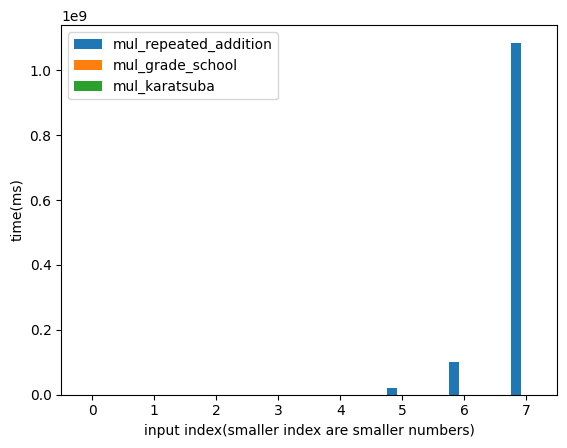

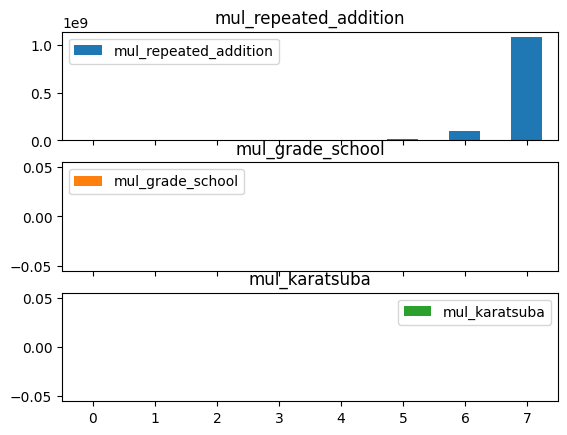

In [ ]:
comp = Comparator([mul_repeated_addition, mul_grade_school, mul_karatsuba])
comp.compare()

## karatsuba VS grade school

,mul_grade_school,mul_karatsuba,description
0,3.040000e+04,0.000000e+00,34996356 * 34566
1,3.181333e+05,0.000000e+00,34908534596356 * 349085344566
2,0.000000e+00,0.000000e+00,349085345963456474456 * 34908534456756474456
3,2.050333e+05,0.000000e+00,3490853459634546575675647456756474456 * 367564...
4,6.133000e+05,3.872000e+05,3490853459634546575675647456756474456745677456...
5,6.856333e+05,3.335667e+05,3490853459634546575675647456756474456745675467...
6,9.999333e+05,3.352667e+05,3490853459634546575675647456756474456745675467...
7,1.333767e+06,7.242000e+05,3490853459634546575675647456756474456745675467...
8,1.353333e+06,6.670333e+05,3490853459634546575675647456756474456745675467...
9,1.665833e+06,6.674000e+05,3490853459634546575675647456756474456745675467...


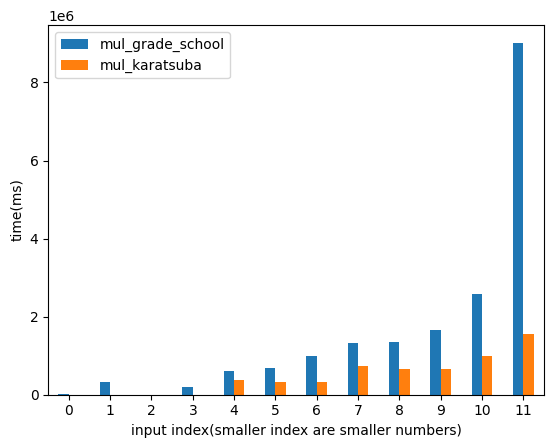

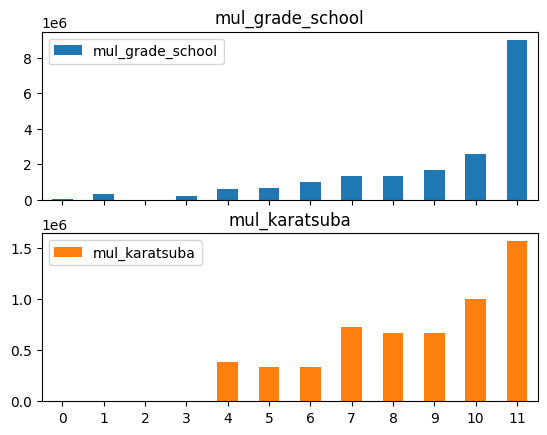

In [ ]:
data = [[34996356, 34566],
        [34908534596356, 349085344566],
        [349085345963456474456, 34908534456756474456],
        [3490853459634546575675647456756474456, 367564745675647456723476],
        [3490853459634546575675647456756474456745677456745, 3490853459634546575675647456756474456745677456745],
        [34908534596345465756756474567564744567456754674567455423476, 34908534596345465756756474567564744567456754674567455423476],
        [3490853459634546575675647456756474456745675467456745674567456743476, 3490853459634546575675647456756474456745675467456745674567456743476],
        [3490853459634546575675647456756474456745675467456745674567456745674523476, 3490853459634546575675647456756474456745675467456745674567456745674523476],
        [34908534596345465756756474567564744567456754674567456745674567456745755467656, 34908534596345465756756474567564744567456754674567456745674567456745755467656],
        [34908534596345465756756474567564744567456754674567456745674567456745755467656723476, 34908534596345465756756474567564744567456754674567456745674567456745755467656723476],
        [349085345963454657567564745675647445674567546745674567456745674567457554676567234765675467567456745, 349085345963454657567564745675647445674567546745674567456745674567457554676567234765675467567456745],
        [349085345963454657567564745675647445674567546745674567456745674567457554676567234763490853459634546575675647456756474456745675467456745674567456745674575545, 34908534596344674567456745674567456745755467656723476349085345963454657567564745675647445674567546745674567456745674567457554676567234765675467567456745]]

comp = Comparator([mul_grade_school, mul_karatsuba], data, repetition=1)
comp.compare()